<a href="https://colab.research.google.com/github/RahulkMathur/Advance_Data_Science_Course-Intellipaat-/blob/Self_Projects/BoustonHousing_Decisssion_Tree_Regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Conclusion :- Second model for decision tree is better than the first one as Root_mean_squared_error is less in second model

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/BostonHousing.csv")
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
df.shape

(506, 14)

In [ ]:
df.isnull().sum()

,0
crim,0
zn,0
indus,0
chas,0
nox,0
rm,5
age,0
dis,0
rad,0
tax,0


In [ ]:
#we have seen nan values in the cells, so we will fill this NaN with zero
df['rm'].values

array([6.575, 6.421, 7.185, 6.998, 7.147, 6.43 , 6.012, 6.172, 5.631,
       6.004,   nan, 6.009, 5.889, 5.949, 6.096, 5.834, 5.935, 5.99 ,
       5.456, 5.727, 5.57 , 5.965, 6.142, 5.813, 5.924, 5.599, 5.813,
       6.047, 6.495, 6.674, 5.713, 6.072, 5.95 , 5.701, 6.096,   nan,
       5.841, 5.85 , 5.966, 6.595, 7.024, 6.77 , 6.169, 6.211, 6.069,
       5.682, 5.786, 6.03 , 5.399, 5.602, 5.963, 6.115, 6.511, 5.998,
       5.888, 7.249, 6.383, 6.816, 6.145, 5.927, 5.741, 5.966, 6.456,
         nan, 7.104, 6.29 , 5.787, 5.878, 5.594, 5.885, 6.417, 5.961,
       6.065, 6.245, 6.273, 6.286, 6.279, 6.14 , 6.232, 5.874, 6.727,
       6.619, 6.302, 6.167, 6.389, 6.63 , 6.015, 6.121, 7.007, 7.079,
       6.417, 6.405, 6.442, 6.211, 6.249, 6.625,   nan, 8.069, 7.82 ,
       7.416, 6.727, 6.781, 6.405, 6.137, 6.167, 5.851, 5.836, 6.127,
       6.474, 6.229, 6.195, 6.715, 5.913, 6.092, 6.254, 5.928, 6.176,
       6.021, 5.872, 5.731, 5.87 , 6.004, 5.961, 5.856, 5.879, 5.986,
       5.613, 5.693,

In [ ]:
df['rm'].fillna(0,inplace =True)

/tmp/ipython-input-3011501503.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rm'].fillna(0,inplace =True)


In [ ]:
df['rm'].isnull().sum()

np.int64(0)

Text(0, 0.5, 'Median value of home')

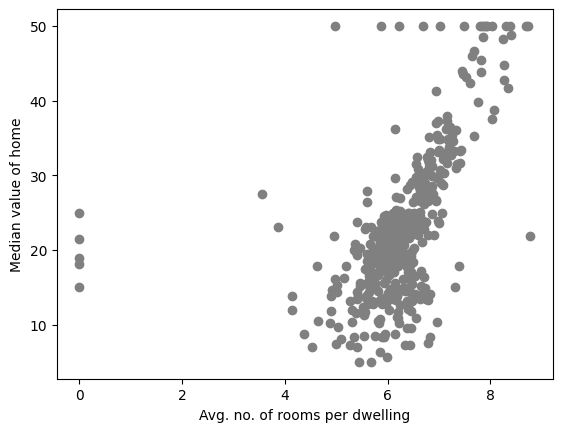

In [ ]:
#scatterplot
plt.scatter(x=df['rm'],y=df['medv'], color='grey')
plt.xlabel('Avg. no. of rooms per dwelling')
plt.ylabel('Median value of home')

In [ ]:
# Getting the features and the target
# Features
x = df['rm'].values
x = x.reshape(-1,1)
x

array([[6.575],
       [6.421],
       [7.185],
       [6.998],
       [7.147],
       [6.43 ],
       [6.012],
       [6.172],
       [5.631],
       [6.004],
       [0.   ],
       [6.009],
       [5.889],
       [5.949],
       [6.096],
       [5.834],
       [5.935],
       [5.99 ],
       [5.456],
       [5.727],
       [5.57 ],
       [5.965],
       [6.142],
       [5.813],
       [5.924],
       [5.599],
       [5.813],
       [6.047],
       [6.495],
       [6.674],
       [5.713],
       [6.072],
       [5.95 ],
       [5.701],
       [6.096],
       [0.   ],
       [5.841],
       [5.85 ],
       [5.966],
       [6.595],
       [7.024],
       [6.77 ],
       [6.169],
       [6.211],
       [6.069],
       [5.682],
       [5.786],
       [6.03 ],
       [5.399],
       [5.602],
       [5.963],
       [6.115],
       [6.511],
       [5.998],
       [5.888],
       [7.249],
       [6.383],
       [6.816],
       [6.145],
       [5.927],
       [5.741],
       [5.966],
       [

In [ ]:
#Target
y = df['medv'].values
y =y.ravel()
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [ ]:
#creating training and test data by spliting the dataset

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20)

In [ ]:
#Building the model
from sklearn.tree import DecisionTreeRegressor

DecisionTree = DecisionTreeRegressor()
DecisionTree = DecisionTree.fit(x_train,y_train)

In [ ]:
#prediciting the value
y_pred = DecisionTree.predict(x_test)
y_pred

array([36.2       , 16.1       , 44.8       , 17.1       , 17.2       ,
       21.1       , 20.85      , 20.96666667, 18.8       , 26.6       ,
       13.5       , 20.2       , 36.2       ,  5.        , 33.5       ,
       33.7       , 13.9       , 21.3       , 36.        , 12.15      ,
       50.        ,  9.6       , 11.5       , 23.3       , 23.3       ,
       17.5       , 16.4       , 27.1       , 22.        , 20.6       ,
       15.6       , 19.4       , 30.1       , 25.1       , 18.8       ,
       22.5       , 20.5       , 35.4       , 17.7       , 22.2       ,
       22.2       , 20.6       , 10.5       , 34.8       , 13.8       ,
       18.5       , 20.6       , 37.        , 21.7       , 31.2       ,
       16.4       , 30.8       , 32.2       , 23.3       , 44.6       ,
        9.7       , 15.7       , 33.2       ,  7.2       , 19.2       ,
       37.        ,  8.4       , 20.9       , 22.        , 23.3       ,
       10.2       , 25.        , 23.1       , 32.7       , 12.15

In [ ]:
#Finding the error
from sklearn.metrics import mean_squared_error,root_mean_squared_error, mean_absolute_percentage_error

mse = mean_squared_error(y_pred,y_test)
print({mse})

rmse = np.sqrt(mse)
print({rmse})

MAPE = mean_absolute_percentage_error(y_test,y_pred)
print({MAPE})

{57.15755174291938}
{np.float64(7.5602613541410975)}
{0.2759676145840084}


MAPE is less than 30% considering a decission tree as a good model.

In [ ]:
# Getting 2nd model here - which is having 3 independent variables and
x = df[['rm','lstat','age']].values #features
print(x)

print("="*50)

y = df['medv'].values
y =y.ravel()
print(y)

[[ 6.575  4.98  65.2  ]
 [ 6.421  9.14  78.9  ]
 [ 7.185  4.03  61.1  ]
 ...
 [ 6.976  5.64  91.   ]
 [ 6.794  6.48  89.3  ]
 [ 6.03   7.88  80.8  ]]
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.

In [ ]:
# Splitting the data for training and testing

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30)


In [ ]:
# Builging the model

from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor()
DT.fit(x_train,y_train)

DecisionTreeRegressor()

In [ ]:
# Prediciting the values

y_pred = DT.predict(x_test)
y_pred

array([22. , 23. , 21. ,  8.8,  8.8, 33.4, 19.4, 18.4, 14.3, 33.3, 30.1,
       24.5, 13.4, 15. , 15. , 19.4, 30.8, 25.3, 21.7, 19.2, 29.9, 28.5,
       24.3, 22.5, 21.5, 50. , 14.6, 19.1,  8.3, 16.1, 16.1, 12.7, 20. ,
       19.4, 19.9, 11.8, 22.5, 18.8, 18.7, 18.3, 33.4,  8.7,  6.3, 22.7,
       33.2, 22.8, 13.4, 19.9, 33.3, 21.5, 31.2, 21.2, 13.9, 30.1, 23. ,
        8.3, 38.7, 32.4, 30.3, 12.7,  8.4, 19.4, 11.8, 20. , 10.2, 13.4,
       31.1, 33.4, 18.6, 10.2, 22.5, 23.1, 13.1, 22.5, 19. , 22.8, 23.1,
       21.2, 23. , 22.4, 17.4, 10.8, 19.4, 29. ,  5. , 23.9, 28.5, 31.6,
       22. , 23.6, 24. ,  9.7, 12.6, 13.1, 31.2, 18.9, 15.4, 11.9, 42.3,
       30.1, 24.8, 30.8, 19.1, 16. , 13. , 50. , 32. , 24.5, 20. , 50. ,
       17.4,  8.3, 20. , 19.1, 21.9, 31.2, 13.8,  8.7, 29. , 50. , 16.5,
       15.2, 14.6, 50. , 30.8,  8.3, 15.1, 29.6, 21. , 29.4, 34.9, 14.5,
       13.3, 37.2,  8.4, 50. , 14.8, 16.1, 13.3, 24.8, 33.3, 23.1, 28.7,
       24.3, 18.9, 19.4, 20. , 22.4, 23.1, 35.1, 44

In [ ]:
#finding the error

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_pred,y_test)
print(mse)
rmse =np.sqrt(mse)
print(rmse)

39.23276315789474
6.263606242245336


Second model is having less RMSE so we consider 2nd model is better than the first.